In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
trending_videos = pd.read_csv('Data/trending_videos.csv')
trending_videos = trending_videos[['snapshot_date', 'category']]
trending_videos['category'] = trending_videos['category'].fillna('Unknown')
category_counts = trending_videos['category'].value_counts()
trending_videos['category'] = trending_videos['category'].apply(lambda x: x if category_counts[x] >= 400 else 'Others')
trending_videos = trending_videos.groupby(['snapshot_date', 'category']).size().unstack(fill_value=0)
trending_videos.index = pd.to_datetime(trending_videos.index)
trending_videos['month'] = trending_videos.index.to_period('M')
monthly_data = trending_videos.groupby('month').sum()
# monthly_data

In [70]:
#% chủ đề trên trending

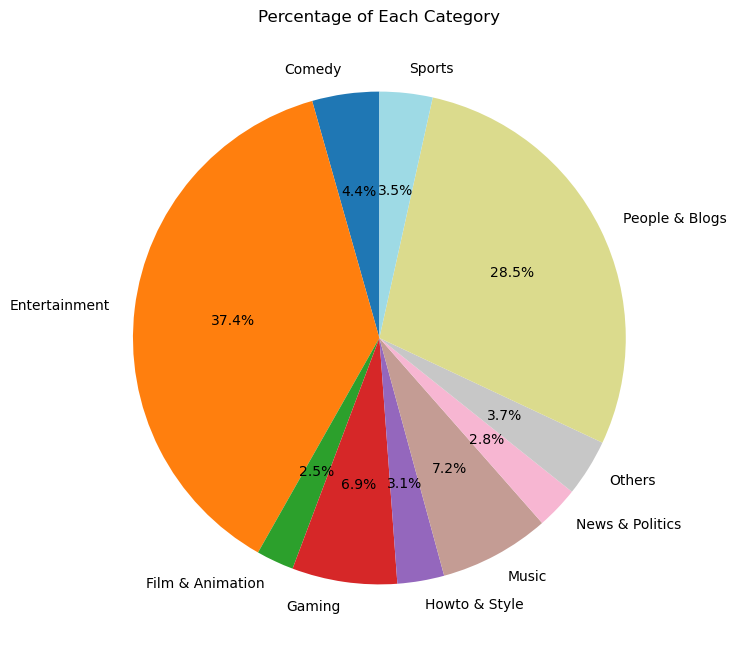

In [71]:
category_percentage = monthly_data.sum().div(monthly_data.sum().sum()) * 100

# Plot the pie chart
plt.figure(figsize=(10, 8))
category_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Percentage of Each Category')
plt.ylabel('')
plt.show()

In [72]:
#Trung bình lượt tương tác (like/view và /comment/view) trên chủ đề

In [73]:
trending_videos = pd.read_csv('Data/trending_videos.csv').iloc[:, 1:]
avg_views_likes_comments = trending_videos.loc[::, ["category", "view_count", "like_count", "comment_count"]]

# avg_views_likes_comments['category'] = pd.to_datetime(avg_views_likes_comments['category'])
# avg_views_likes_comments['category'] = avg_views_likes_comments['category'].dt.to_period('M')
avg_views_likes_comments = avg_views_likes_comments.groupby('category').mean().reset_index()


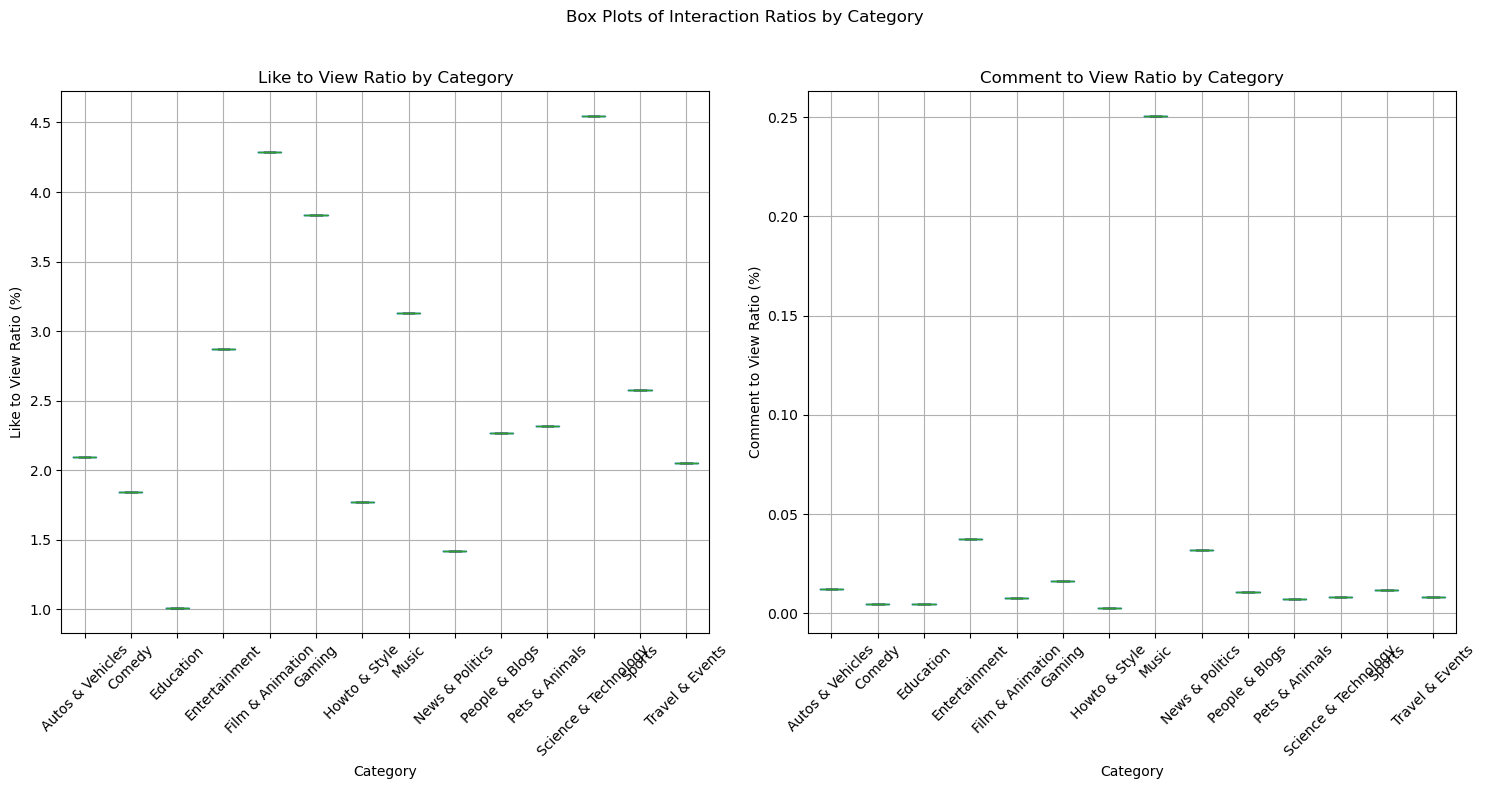

In [74]:
# Create a box plot for like_to_view and comment_to_view ratios by category
avg_views_likes_comments['like_to_view'] = (avg_views_likes_comments['like_count'] / avg_views_likes_comments['view_count']) * 100
avg_views_likes_comments['comment_to_view'] = (avg_views_likes_comments['comment_count'] / avg_views_likes_comments['view_count']) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Box plot for like_to_view ratio
avg_views_likes_comments.boxplot(column='like_to_view', by='category', ax=axes[0])
axes[0].set_title('Like to View Ratio by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Like to View Ratio (%)')
axes[0].tick_params(axis='x', rotation=45)

# Box plot for comment_to_view ratio
avg_views_likes_comments.boxplot(column='comment_to_view', by='category', ax=axes[1])
axes[1].set_title('Comment to View Ratio by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Comment to View Ratio (%)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.suptitle('Box Plots of Interaction Ratios by Category')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [75]:
trending_videos = pd.read_csv('Data/trending_videos_unique.csv')

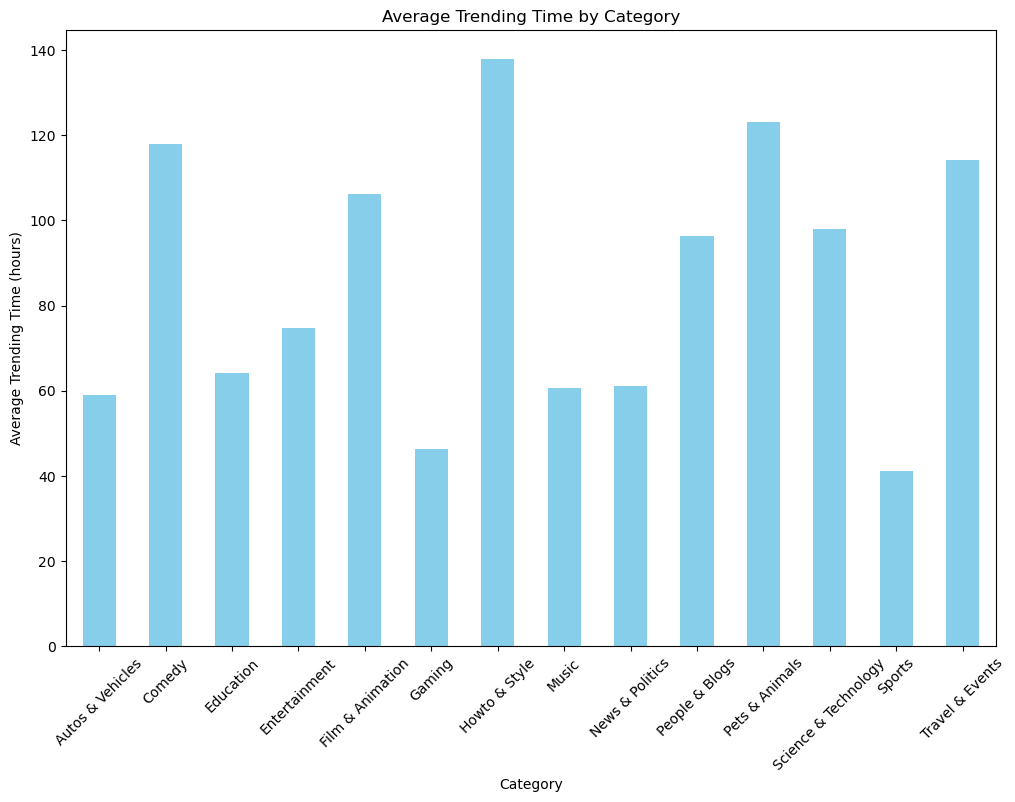

In [76]:
# Convert 'time_to_trending' to timedelta
trending_videos['time_to_trending'] = pd.to_timedelta(trending_videos['time_to_trending'])

# Calculate the average trending time for each category
avg_trending_time = trending_videos.groupby('category')['time_to_trending'].mean()

# Convert the average trending time to hours for better readability
avg_trending_time_hours = avg_trending_time / np.timedelta64(1, 'h')

# Plot the average trending time
plt.figure(figsize=(12, 8))
avg_trending_time_hours.plot(kind='bar', color='skyblue')
plt.title('Average Trending Time by Category')
plt.xlabel('Category')
plt.ylabel('Average Trending Time (hours)')
plt.xticks(rotation=45)
plt.show()
